In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [9]:
def load_data():
    digits = load_digits()
    return digits.data, digits.target, digits.images


In [7]:
# digits = load_digits()
# X = digits.data
# y = digits.target

# df_X = pd.DataFrame(X, columns=digits.feature_names)
# df_y = pd.DataFrame(y, columns= ['target'])

# display(df_X.head())
# display(df_y.head())

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


,target
0,0
1,1
2,2
3,3
4,4


In [10]:
def apply_pca(X, n_components=2, random_state = 42):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca, pca

In [14]:
def plot_pca(X_pca, y):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='tab10', s=40, alpha=0.8)
    plt.title("Digits nelle prime due componenti PCA")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

In [12]:
def train_classifier(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)

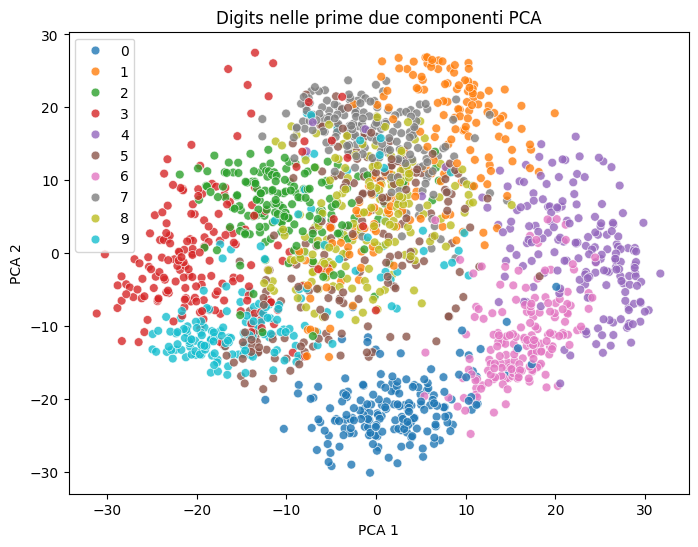

Accuratezza sui dati originali con SVC: 0.9796296296296296
Accuratezza sui dati ridotti con PCA con SVC: 0.6333333333333333


In [15]:
def main():
    X, y, images = load_data()
    
    # PCA
    X_pca, pca = apply_pca(X, n_components=2)
    plot_pca(X_pca, y)

    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # SVC
    clf_svc = SVC(kernel='linear')
    accuracy_svc_original = train_classifier(X_train, X_test, y_train, y_test, clf_svc)
    print(f"Accuratezza sui dati originali con SVC: {accuracy_svc_original}")


    # PCA split
    X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

   
    # SVC con PCA
    accuracy_svc_pca = train_classifier(X_pca_train, X_pca_test, y_train, y_test, clf_svc)
    print(f"Accuratezza sui dati ridotti con PCA con SVC: {accuracy_svc_pca}")

main()